# Laboratório de Processamento de Sinais para Comunicações
##  Prárica 01 - Amostragem

### Aluno - Matrícula:

Ezequias Márcio Silva de Santana Júnior - 371887

In [1]:
"""
Docstring do trabalho...
"""

# Importando os módulos necessários para a execução do código.
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

### Plotando sinal:

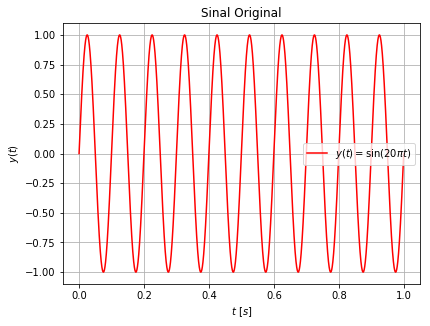

In [2]:
# Definindo sample rate global em 32k amostras em 1 segundo, simulando sinal o contínuo:
sr = 32000 

# Valores de t in [0, 1] segundos:
time = np.linspace(0, 1, sr)

# Construção do sinal:
freq = 10 # Hz
signal = np.sin(2*np.pi*freq*time)

# Plotando a curva:
dim = 1*6.4                                          # Dimensões da figura (múltiplos de 6.4)
plt.figure('analog_signal', figsize=[dim, 0.75*dim]) # Inicializando figura
plt.title('Sinal Original')                          #
plt.xlabel('$t$ [$s$]')                              # Título, eixos
plt.ylabel('$y(t)$')                                 #
plt.plot(time, signal, 'r', label='$y(t) = \sin(20\pi t)$') # plot
#plt.axis([-0.025, 1.025, -1.25, 1.25])              # Trata os eixos (opcional)
plt.grid()                                           # Habilita o grid
plt.legend(loc='best')#'upper right')                # Habilita a legenda (opcional)
plt.show()                                           # Mostra a figura

### Amostragem:

In [ ]:
# Definindo frequência de amostragem:
sample_freq = 51 #Hz

# Instantes de tempo em que o sinal é amostrado:
ts = np.linspace(0, 1, sample_freq)

# Amostras do sinal
samp_signal = np.sin(2*np.pi*freq*ts)

# Plotagem do sinal amostrado e original
dim = 1.25*6.4 
plt.figure('sampled_signal', figsize=[dim, 0.75*dim])
plt.title('Sinal Amostrado @ $f_s$ {}Hz'.format(sample_freq))
plt.xlabel('$t$ [$s$]')
plt.ylabel('Amplitude') 
plt.plot(time, signal, 'r--', label='$y(t)$')
plt.stem(ts, samp_signal, linefmt='-C0', markerfmt='C0o', basefmt='k-', label='$y_a(n)$')
plt.stem
#plt.axis([-0.025, 1.025, -1.25, 1.25])              # Trata os eixos (opcional)
plt.grid()                                           # Habilita o grid
plt.legend(loc='best')#'upper right')                # Habilita a legenda (opcional)
plt.show()                                           # Mostra a figura


### Recuperação:

plot azul e plot o erro em magenta

In [ ]:
def rec_zero_order(sampled, sr):
    
    def rect(t):
        if abs(t) > 0.5:
            return 0
        elif abs(t) < 0.5:
            return 1
        else:
            return 0.5
    
    zero_order = np.zeros(sr)
    for t in range(sr):
        soma = 0
        for n in range(26):
            soma += rect((time[t] - 0.5*Ts - n*Ts)/Ts)*samp_signal[n]
        zero_order[t] = soma
    
    return zero_order

In [ ]:
# Nyquist..
2*np.pi*10
# fazer o caso do erro para essa freq...

In [ ]:
# -------------------------------------------------------------------------------------

def samp(sample_freq):
    
    dim = 1*6.4
    plt.figure(figsize=[dim, 0.75*dim])
    plt.plot(time, signal, 'r:')
    
    # Uso do arange: anda n vezes o passo e amostra n+1 vezes, ou seja fs = fs+1
    # ts = np.arange(0, 1 + 1/sample_freq, 1/sample_freq) # passo = 1/fs 
    ts = np.linspace(0, 1, sample_freq)
    samp_signal = np.sin(2*np.pi*freq*ts)
    plt.stem(ts, samp_signal, linefmt='-C0', markerfmt='C0o', basefmt='k-')
    
    plt.grid()
    plt.show()
    return samp_signal

w2 = widgets.interactive(samp, sample_freq=(9, 65, 1))
display(w2)


In [ ]:
samp_signal = w2.result
print(samp_signal.size)

## Início do trabalho...

de finir o sinal e plotar é o primeiro passo já que o sinal é imutável...

" tentafiva de implementar tudo com base na interação ???? seria em cas cata pra casa vez que eu mudasse

tratar as variáveis para caso geral com uma só inicialização

In [ ]:
sr = 32000 # Sample rate global, 32k amostras em 1 segundo
time = np.linspace(0, 1, sr)
freq = 10
dim = 1*6.4
y = np.sin(2*np.pi*freq*time)
plt.figure(figsize=[dim, 0.75*dim])
plt.plot(time, y, 'r:')

sampling_freq = 11
t2 = np.arange(0, 1 + 1/sampling_freq, 1/sampling_freq) # passo = 1/fs 
plt.stem(t2, np.sin(2*np.pi*freq*t2), linefmt='-C0', markerfmt='o', basefmt='k-')
plt.grid()
plt.show()

### Reconstruções 


- ordem zero
- interpolar
- ideal


In [ ]:
def rec_zero_order(yn, sr):
    
    def rect(t):
        if abs(t) > 0.5:
            return 0
        elif abs(t) < 0.5:
            return 1
        else:
            return 0.5
    
    zero_order = np.zeros(sr)
    for t in range(len(time)):
        soma = 0
        for n in range(26):
            soma += rect((time[t] - 0.5*Ts - n*Ts)/Ts)*samp_signal[n]
        zero_order[t] = soma
    
    return zero_order


def rec_linear_interp(yn, sr):
    
    
    return

def rec_ideal_interp(yn, sr):
    ideal = np.zeros(sr)
    for t in range(len(time)):
        soma = 0
        for n in range(26):
            soma += np.sinc((time[t]  - n*Ts)/Ts)*samp_signal[n]
        ideal[t] = soma
    
    return ideal


In [ ]:
fs = samp_signal.size
Ts = 1/(fs-1)

sr = 32000 # Sample rate global, 32k amostras em 1 segundo, domínio do sinal x_a
time = np.linspace(0, 1, sr)

time.size

def rect(t):
    
    if abs(t) > 0.5:
        return 0
    elif abs(t) < 0.5:
        return 1
    else:
        return 0.5
    
r = np.arange(-1.1, 1.1, 0.01)
q = np.array([rect(x) for x in r])

plt.plot(r,q)

In [ ]:
# explicar funcionamento...  https://en.wikipedia.org/wiki/Zero-order_hold

rec_zero_order = np.zeros(sr)
for t in range(len(time)):
    soma = 0
    for n in range(26):
        soma += rect((time[t] - 0.5*Ts - n*Ts)/Ts)*samp_signal[n]
    rec_zero_order[t] = soma


plt.plot(rec_zero_order)


In [ ]:
# explicar funcionamento...  http://fourier.eng.hmc.edu/e101/lectures/Sampling_theorem/node3.html

# rec_lin = np.zeros(sr)
# for t in range(len(time)):
#     soma = 0
#     for n in range(26):
#         soma += tri((time[t]))*samp_signal[n]
#     rec_lin[t] = soma


# plt.plot(rec_lin)
print(samp_signal )
ts = np.linspace(0,1,26) #   !!!!!
rec_lin = np.zeros(32000)
time = np.linspace(0, 1, 32000)

# for t in range(32000):
#     for i in range(len(samp_signal)-1):
#         if time[t] > ts[i] and time[t] < ts[i+1]:
#             rec_lin[t] = samp_signal[i] + (time[t] - ts[i])*(samp_signal[i+1] - samp_signal[i])/(ts[i+1] - ts[i])

rec_lin = np.interp(time, ts, samp_signal)

print(rec_lin)
plt.plot(rec_lin)

In [ ]:
# TODO: Organizar e tratar erro fazer plots 


# erro = original - rec
# plot
# np.mean(abs(erro))

# linspace anda 10 deltas e amostra 11 vezes
# arange anda 11 deltas amostra 12 vezes
# n = 26
# print(np.arange(0, 1+1/n, 1/n)) 
# np.linspace(0, 1, n)

# import IPython.display as ipd

# ipd.Audio(0.001*np.sin(2*np.pi*10*time), rate=32000)
